In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
laptop_data = pd.read_csv('laptop_data.csv')
laptop_data

,id,Company,TypeName
0,0,Apple,Ultrabook
1,1,Apple,Ultrabook
2,2,HP,Notebook
3,3,Apple,Ultrabook
4,4,Apple,Ultrabook
...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible
1299,1299,Lenovo,2 in 1 Convertible
1300,1300,Lenovo,Notebook
1301,1301,HP,Notebook


In [3]:
laptop_details = pd.read_csv('laptop_details.csv')
laptop_details

,id,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,£705.74
1,1,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,£473.56
2,2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,£302.91
3,3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,£1336.71
4,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,£950.13
...,...,...,...,...,...,...,...,...,...,...
1298,1298,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,£336.09
1299,1299,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,£789.67
1300,1300,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,£120.64
1301,1301,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,£402.47


In [4]:
df = pd.merge(laptop_data,laptop_details,how='inner',on='id')
df

,id,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,£705.74
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,£473.56
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,£302.91
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,£1336.71
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,£950.13
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,£336.09
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,£789.67
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,£120.64
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,£402.47


In [5]:
df.drop(columns='id',inplace=True)

In [6]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,£705.74
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,£473.56
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,£302.91
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,£1336.71
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,£950.13
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,£336.09
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,£789.67
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,£120.64
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,£402.47


In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.duplicated().sum()

29

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,£705.74
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,£473.56
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,£302.91
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,£1336.71
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,£950.13
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,£379.46
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,£336.09
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,£789.67
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,£120.64


# Handling Company Feature


In [12]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [13]:
company_counts = df['Company'].value_counts()

In [14]:
 company_counts

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [15]:
companies_to_replace = company_counts[company_counts<=20].index

In [16]:
for i in df['Company']:
    if i in companies_to_replace : 
        df['Company'].replace(i,'Other' , inplace = True)

df['Company'].value_counts()

Company
Dell       291
Lenovo     289
HP         268
Asus       151
Acer       101
MSI         54
Other       51
Toshiba     48
Apple       21
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   object 
dtypes: float64(1), object(10)
memory usage: 119.4+ KB


In [18]:
df['Price']=df['Price'].str.replace('£','').astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


<Axes: xlabel='Company', ylabel='Price'>

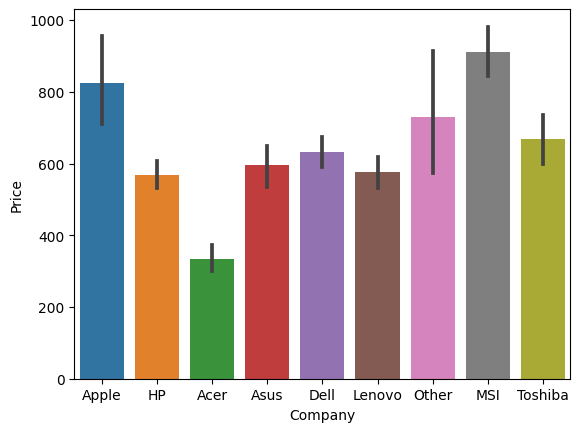

In [20]:
sns.barplot(x='Company', y='Price', data=df)

# Handling TypeName Feature

In [21]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [22]:
TypeName_Count = df['TypeName'].value_counts()

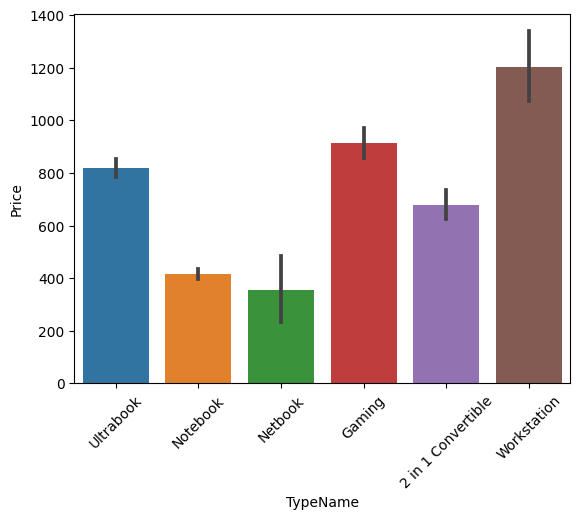

In [23]:
sns.barplot(x='TypeName' , y='Price' , data=df)
plt.xticks(rotation=45)
plt.show()

# Inches Feature

<Axes: xlabel='Inches', ylabel='Price'>

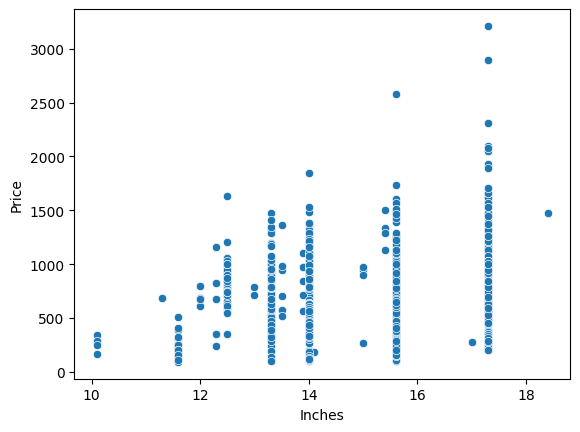

In [24]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [25]:
df['Inches'].value_counts()

Inches
15.6    646
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

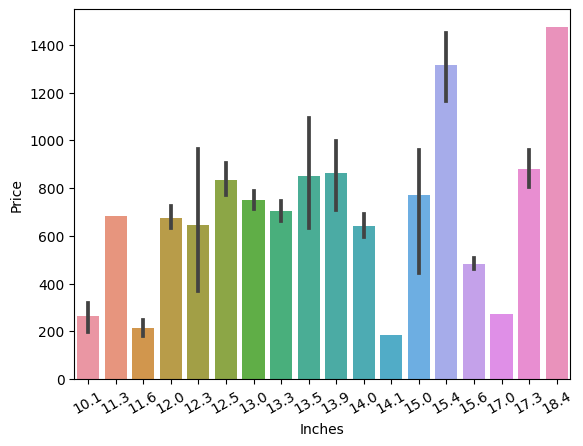

In [26]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=30)
plt.show()

# Screen Resolution Feature

In [27]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

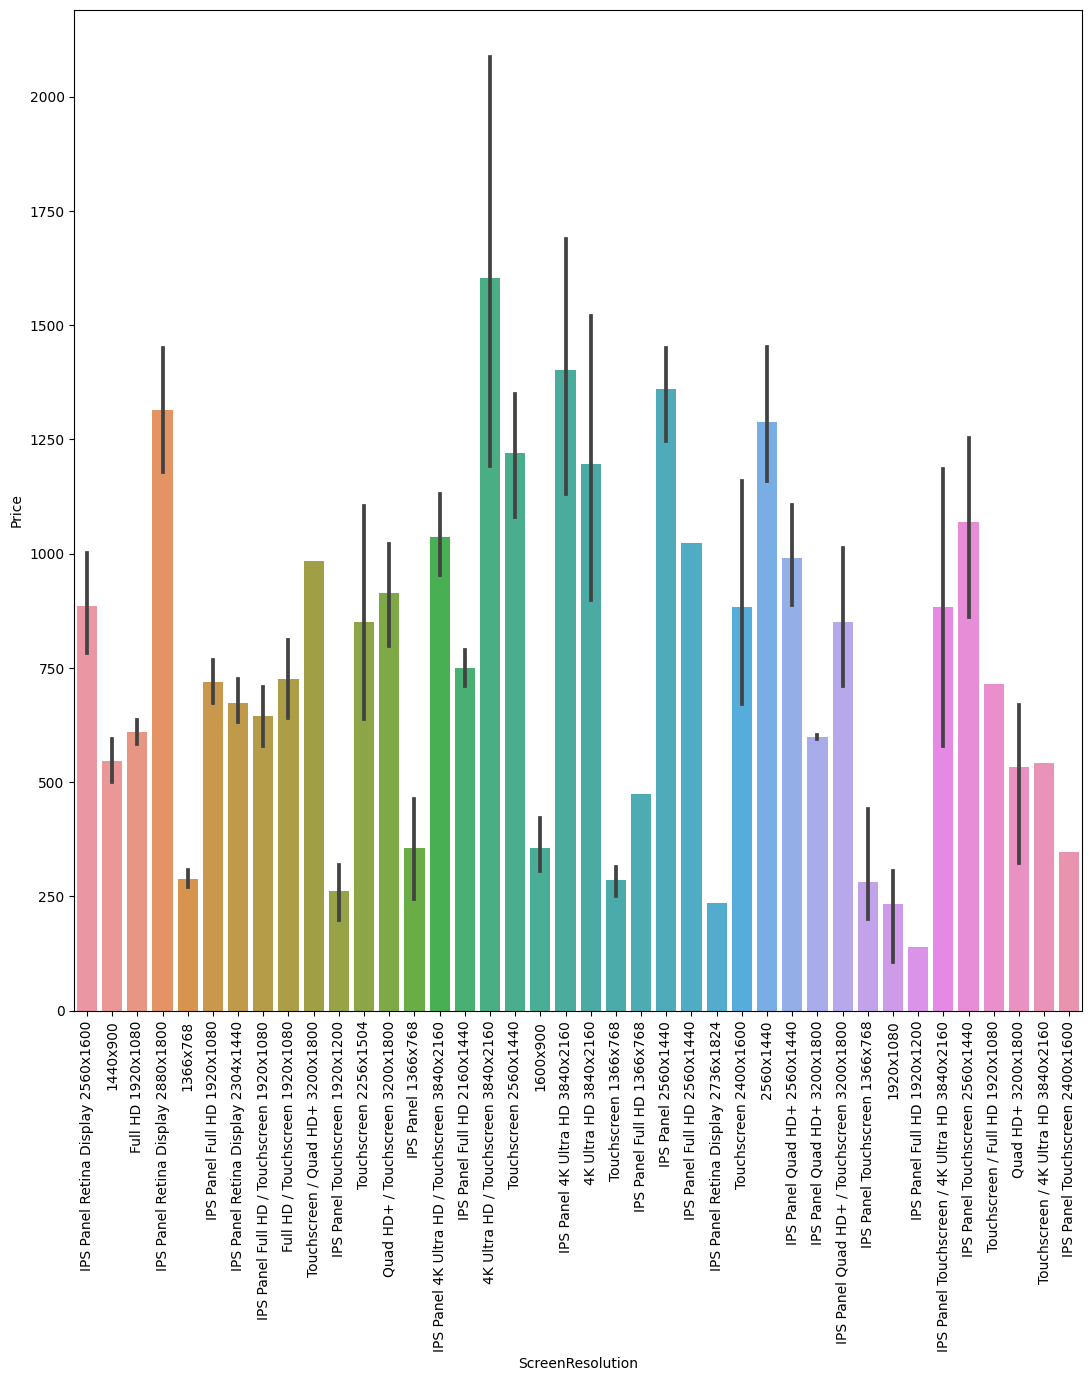

In [28]:
plt.figure(figsize = (13,13))
sns.barplot(x=df['ScreenResolution'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

# Checking for Touchscreen

In [29]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [30]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,705.74,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,473.56,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,302.91,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1336.71,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,950.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,379.46,0
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,336.09,1
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,789.67,1
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,120.64,0


In [31]:
df['TouchScreen'].value_counts()

TouchScreen
0    1086
1     188
Name: count, dtype: int64

<Axes: xlabel='TouchScreen', ylabel='Price'>

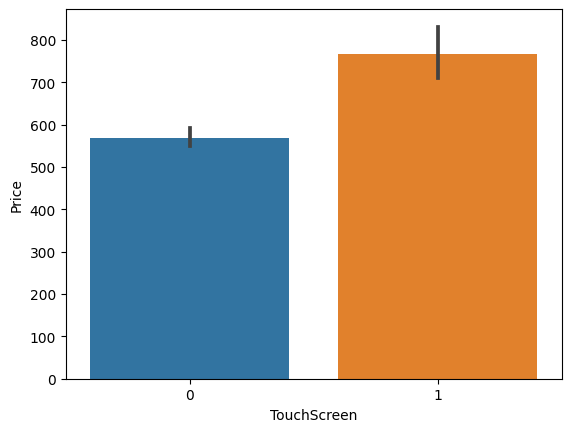

In [32]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

# Checking IPS Panel

In [33]:
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [34]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,705.74,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,473.56,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,302.91,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1336.71,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,950.13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,379.46,0,0
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,336.09,1,1
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,789.67,1,1
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,120.64,0,0


In [35]:
df['IPS Panel'].value_counts()

IPS Panel
0    917
1    357
Name: count, dtype: int64

<Axes: xlabel='TouchScreen', ylabel='Price'>

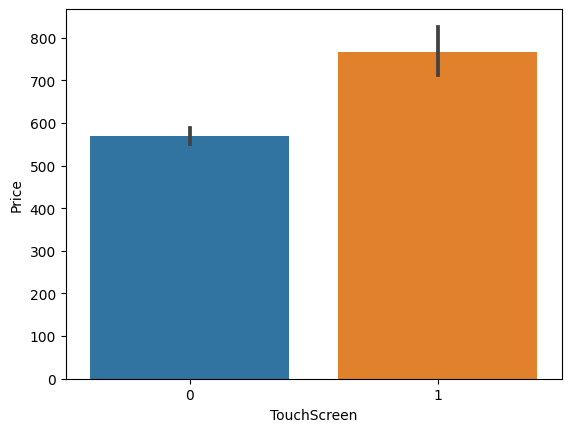

In [36]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [37]:
resolution = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand=True)

In [38]:
resolution

,0,1
0,2560,1600
1,1440,900
2,1920,1080
3,2880,1800
4,2560,1600
...,...,...
1269,1366,768
1270,1920,1080
1271,3200,1800
1272,1366,768


In [39]:
df['X_res'] = resolution[0].astype(int)
df['Y_res'] = resolution[1].astype(int)

In [40]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,705.74,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,473.56,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,302.91,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1336.71,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,950.13,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,379.46,0,0,1366,768
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,336.09,1,1,1920,1080
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,789.67,1,1,3200,1800
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,120.64,0,0,1366,768


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS Panel         1274 non-null   int64  
 13  X_res             1274 non-null   int32  
 14  Y_res             1274 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 149.3+ KB


# Handling CPU Feature

In [42]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [43]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [44]:
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,Cpu_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,705.74,0,1,2560,1600,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,473.56,0,0,1440,900,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,302.91,0,0,1920,1080,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1336.71,0,1,2880,1800,Intel
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,950.13,0,1,2560,1600,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,379.46,0,0,1366,768,Intel
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,336.09,1,1,1920,1080,Intel
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,789.67,1,1,3200,1800,Intel
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,120.64,0,0,1366,768,Intel


<Axes: xlabel='Cpu_Brand', ylabel='Price'>

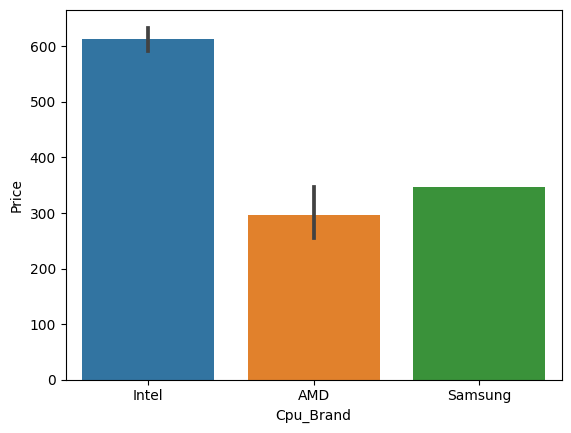

In [45]:
sns.barplot(x=df['Cpu_Brand'] , y=df['Price'])

In [46]:
df['Cpu_Speed'] = df['Cpu'].apply(lambda x: x.split()[-1])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,Cpu_Brand,Cpu_Speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,705.74,0,1,2560,1600,Intel,2.3GHz
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,473.56,0,0,1440,900,Intel,1.8GHz
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,302.91,0,0,1920,1080,Intel,2.5GHz
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1336.71,0,1,2880,1800,Intel,2.7GHz
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,950.13,0,1,2560,1600,Intel,3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,379.46,0,0,1366,768,Intel,2.5GHz
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,336.09,1,1,1920,1080,Intel,2.5GHz
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,789.67,1,1,3200,1800,Intel,2.5GHz
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,120.64,0,0,1366,768,Intel,1.6GHz


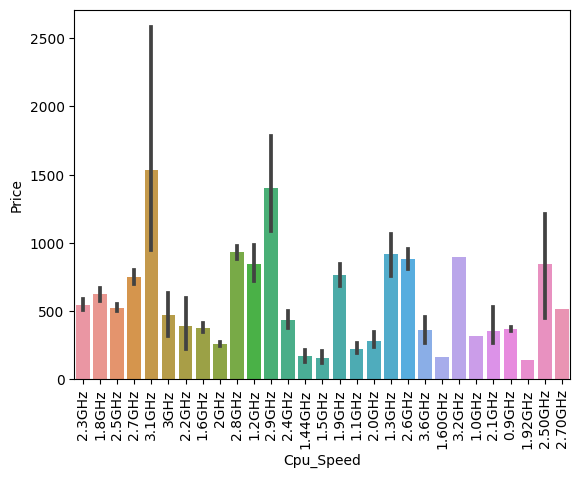

In [47]:
sns.barplot(x=df['Cpu_Speed'] , y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [48]:
df['Cpu_Speed']= df['Cpu_Speed'].str.replace('GHz' , '').astype(float)

In [49]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,Cpu_Brand,Cpu_Speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,705.74,0,1,2560,1600,Intel,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,473.56,0,0,1440,900,Intel,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,302.91,0,0,1920,1080,Intel,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1336.71,0,1,2880,1800,Intel,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,950.13,0,1,2560,1600,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,379.46,0,0,1366,768,Intel,2.5
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,336.09,1,1,1920,1080,Intel,2.5
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,789.67,1,1,3200,1800,Intel,2.5
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,120.64,0,0,1366,768,Intel,1.6


# Handling Ram Feature

In [50]:
df['Ram'].value_counts()

Ram
8GB     613
4GB     366
16GB    198
6GB      35
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: count, dtype: int64

<Axes: xlabel='Ram', ylabel='Price'>

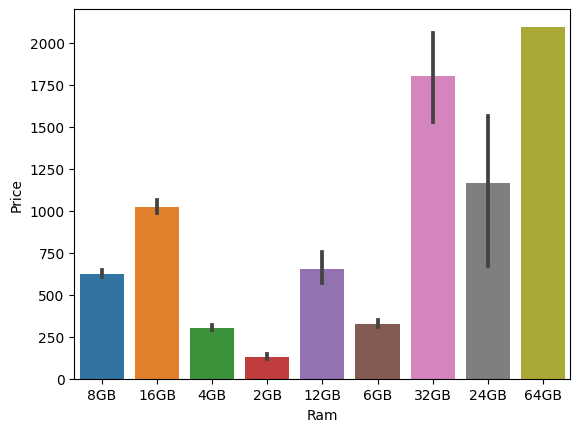

In [51]:
sns.barplot(x=df['Ram'] , y=df['Price'])

In [52]:
df['Ram']=df['Ram'].str.replace('GB','').astype(int)

<Axes: >

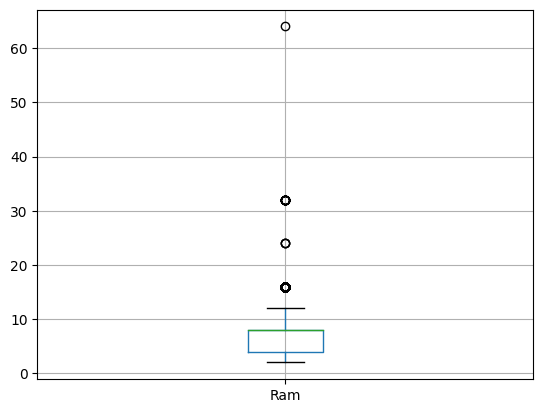

In [53]:
df[['Ram']].boxplot()

In [54]:
Q1  = df['Ram'].quantile(0.25)
Q3 = df['Ram'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['Ram'] < lower_bound) | (df['Ram'] > upper_bound)]
outliers['Ram'].value_counts()

Ram
16    198
32     17
24      3
64      1
Name: count, dtype: int64

In [55]:
lower_bound , upper_bound

(-2.0, 14.0)

In [56]:
df['Ram'].value_counts()

Ram
8     613
4     366
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64

In [57]:
df['Ram'] = df['Ram'].apply(lambda x : 16 if x > upper_bound else x) # Replacing values greater than upper bound by 16
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,Cpu_Brand,Cpu_Speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,705.74,0,1,2560,1600,Intel,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,473.56,0,0,1440,900,Intel,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,302.91,0,0,1920,1080,Intel,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1336.71,0,1,2880,1800,Intel,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,950.13,0,1,2560,1600,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,379.46,0,0,1366,768,Intel,2.5
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,336.09,1,1,1920,1080,Intel,2.5
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,789.67,1,1,3200,1800,Intel,2.5
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,120.64,0,0,1366,768,Intel,1.6


In [58]:
df['Ram'].value_counts()

Ram
8     613
4     366
16    219
6      35
12     25
2      16
Name: count, dtype: int64

# Handling Memory Feature

In [59]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [60]:
# # df['Memory Capacity'] = df['Memory'].str.split(" ").apply(lambda x : x[0])
# df.drop(columns='Memory Capacity' , inplace=True)

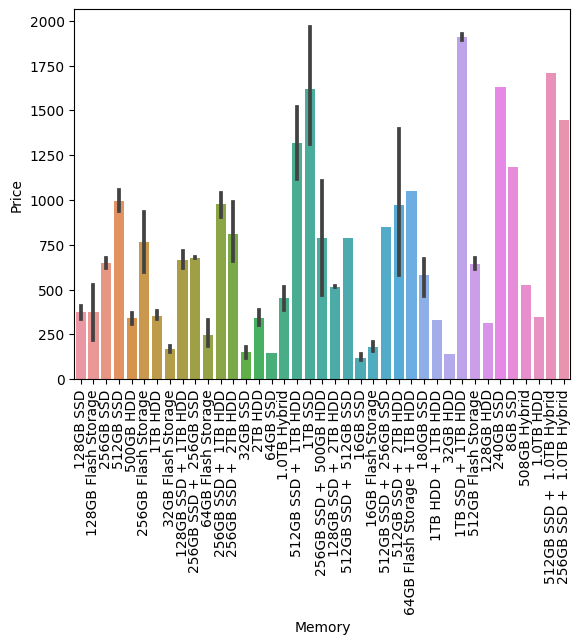

In [61]:
sns.barplot(x=df['Memory'] , y=df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [62]:
def SSD(x):
    if 'SSD' in x : 
        if x.count('SSD')==2 : 
            m1 = x[0]
            m1 = m1.split('G')[0]
            idx2 = x.index('+')
            m2 = x[idx2+1]
            m2 = m2.split('G')[0]
            res = int(m1) + int(m2)
            return res
        else : 
            m1 = x[0]
            # m1 = m1.split('G')[0]
            return m1 
    else:
        return 0

In [63]:
# df['SSD(GB)'] = df['Memory'].str.split().apply(lambda x : x[0] if 'SSD' in x else 0 )
df['SSD(GB)'] = df['Memory'].str.split().apply(lambda x : SSD(x))

In [64]:
def HDD(x):
    if 'HDD' in x : 
        # idx = x.index('HDD')
        # return x[idx-1]
        if x.count('HDD')==2:
            # 1TB HDD +  1TB HDD
            h1 = x[0]
            h1 = int(h1[0])
            hidx = x.index('+')
            h2 = x[hidx + 1]
            h2 = int(h2[0])
            res = h1 + h2 
            new = str(res) + 'TB'
            return new
        else : 
            i1 = x.index('HDD')
            h = x[i1-1]
            return h
    else : 
        return 0
        

In [65]:
df['HDD(GB)'] = df['Memory'].str.split().apply(lambda x : HDD(x))

In [66]:
def Flash_Storage(x):
    if 'Flash' in x : 
        f_idx = x.index('Flash')
        return x[f_idx-1]
    else : 
        return 0

In [67]:
df['Flash Storage(GB)'] = df['Memory'].str.split().apply(lambda x : Flash_Storage(x))

In [68]:
def Hybrid(x):
    if 'Hybrid' in x :
        h_idx = x.index('Hybrid')
        return x[h_idx-1]
    else : 
        return 0 

In [69]:
df['Hybrid(GB)'] = df['Memory'].str.split().apply(lambda x : Hybrid(x))

In [70]:
df[df['Memory'] == '508GB Hybrid']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,TouchScreen,IPS Panel,X_res,Y_res,Cpu_Brand,Cpu_Speed,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB)
976,Lenovo,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,508GB Hybrid,Intel HD Graphics 520,Windows 7,1.70kg,...,0,0,1366,768,Intel,2.3,0,0,0,508GB


# Converting TB to GB

In [71]:
def GB_TB(x):
    x = str(x)
    if 'TB' in x:
        return int(x.replace('TB', '').strip()) * 1000
    else:
        return int(x.replace('GB', '').strip())

def GB_TB_HDD(x):
    x = str(x)
    if 'TB' in x:
        return int(float(x.replace('TB', '').strip()) * 1000)
    else:
        return int(x.replace('GB', '').strip())


In [72]:
df['SSD(GB)'] = df['SSD(GB)'].apply(lambda x : GB_TB(x))

In [73]:
df['SSD(GB)'].unique()

array([ 128,    0,  256,  512,   32,   64, 1000, 1024,   16,  768,  180,
        240,    8], dtype=int64)

In [74]:
df['HDD(GB)'].unique()

array([0, '500GB', '1TB', '2TB', '32GB', '128GB', '1.0TB'], dtype=object)

In [75]:
df['HDD(GB)'] = df['HDD(GB)'].apply(lambda x : GB_TB_HDD(x))

In [76]:
df['HDD(GB)'].unique()

array([   0,  500, 1000, 2000,   32,  128], dtype=int64)

In [77]:
df['Flash Storage(GB)'].unique()

array([0, '128GB', '256GB', '32GB', '64GB', '16GB', '512GB'], dtype=object)

In [78]:
df['Flash Storage(GB)'] = df['Flash Storage(GB)'].apply(lambda x : GB_TB(x))

In [79]:
df['Flash Storage(GB)'].unique()

array([  0, 128, 256,  32,  64,  16, 512], dtype=int64)

In [80]:
df['Hybrid(GB)'].unique()

array([0, '1.0TB', '508GB'], dtype=object)

In [81]:
df['Hybrid(GB)'] = df['Hybrid(GB)'].apply(lambda x : GB_TB_HDD(x))

In [82]:
df['Hybrid(GB)'].unique()

array([   0, 1000,  508], dtype=int64)

In [83]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,TouchScreen,IPS Panel,X_res,Y_res,Cpu_Brand,Cpu_Speed,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB)
933,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6560U 2.2GHz,16,1TB SSD,Intel Iris Graphics 540,Windows 10,1.3kg,...,1,1,3200,1800,Intel,2.2,1000,0,0,0
635,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99kg,...,0,0,1920,1080,Intel,2.5,0,1000,0,0
765,Acer,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.6kg,...,0,0,1366,768,Intel,2.3,128,0,0,0
708,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,0,0,1920,1080,Intel,2.3,256,0,0,0
391,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,3kg,...,0,0,1920,1080,Intel,2.8,256,1000,0,0
940,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75kg,...,0,1,1920,1080,Intel,2.3,128,1000,0,0
403,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Linux,2.5kg,...,0,0,1920,1080,Intel,2.8,256,0,0,0
636,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23kg,...,1,0,3200,1800,Intel,1.6,256,0,0,0
379,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4kg,...,0,0,1920,1080,Intel,2.8,0,1000,0,0
435,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,...,0,0,1920,1080,AMD,3.2,256,1000,0,0


# Handling GPU Feature

In [84]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [85]:
df['GPU Brand'] = df['Gpu'].str.split(" ").apply(lambda x : x[0])

In [86]:
df['GPU Brand'].value_counts()

GPU Brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [87]:
df = df[df['GPU Brand'] != 'ARM']


<Axes: xlabel='GPU Brand', ylabel='Price'>

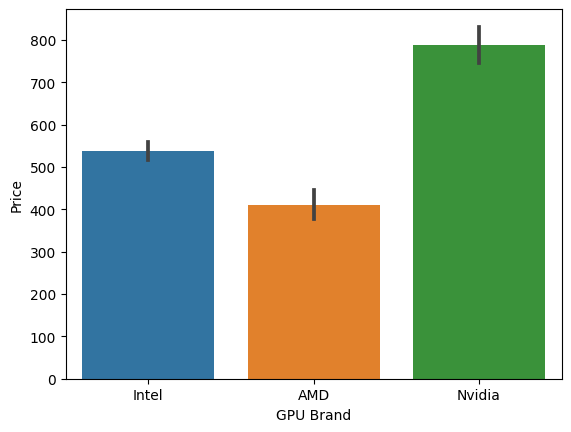

In [88]:
sns.barplot(x=df['GPU Brand'] , y =df['Price'])

# Handling OS

<Axes: xlabel='OpSys'>

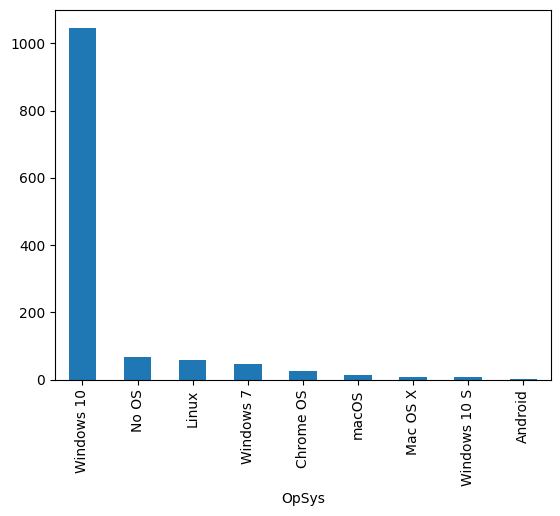

In [89]:
df['OpSys'].value_counts().plot(kind='bar')

In [90]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

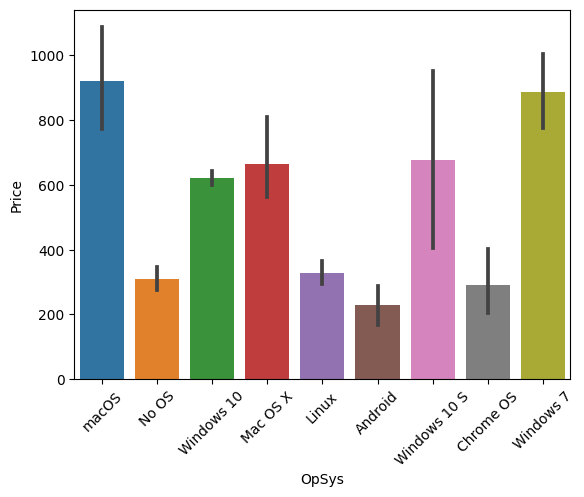

In [91]:
sns.barplot(x=df['OpSys'] , y=df['Price'])
plt.xticks(rotation = 45)
plt.show()

In [92]:
def os(x):
    if x == 'Windows 10' or x == 'Windows 7' or x == 'Windows 10 S':
        return 'Windows'
    elif x == 'macOS' or x == 'Mac OS X':
        return 'Mac'
    elif x== 'Linux':
        return 'Linux'
    else : 
        return 'Other'

In [93]:
df['OpSys']= df['OpSys'].apply(lambda x : os(x))

C:\Users\vedan\AppData\Local\Temp\ipykernel_20856\142846014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OpSys']= df['OpSys'].apply(lambda x : os(x))


In [94]:
df['OpSys'].value_counts()

OpSys
Windows    1100
Other        94
Linux        58
Mac          21
Name: count, dtype: int64

<Axes: xlabel='OpSys', ylabel='Price'>

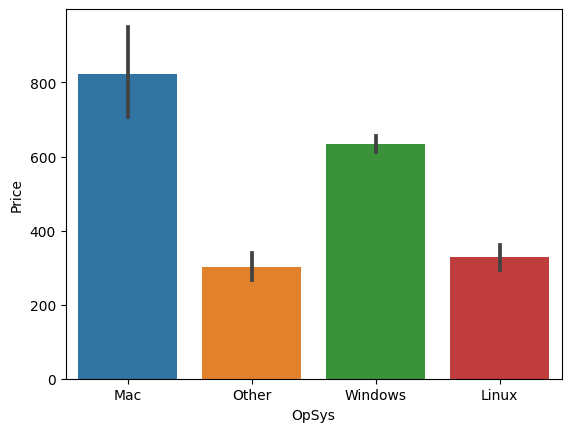

In [95]:
sns.barplot(x=df['OpSys'] , y=df['Price'])

# Handling Weight Feature


In [96]:
df['Weight'].value_counts()

Weight
2.2kg     116
2.1kg      58
2.4kg      42
2.5kg      38
2.3kg      37
         ... 
1.14kg      1
3.8kg       1
1.19kg      1
1.55kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

In [97]:
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)

C:\Users\vedan\AppData\Local\Temp\ipykernel_20856\3989937749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].str.replace('kg','').astype(float)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1273 non-null   object 
 1   TypeName           1273 non-null   object 
 2   Inches             1273 non-null   float64
 3   ScreenResolution   1273 non-null   object 
 4   Cpu                1273 non-null   object 
 5   Ram                1273 non-null   int64  
 6   Memory             1273 non-null   object 
 7   Gpu                1273 non-null   object 
 8   OpSys              1273 non-null   object 
 9   Weight             1273 non-null   float64
 10  Price              1273 non-null   float64
 11  TouchScreen        1273 non-null   int64  
 12  IPS Panel          1273 non-null   int64  
 13  X_res              1273 non-null   int32  
 14  Y_res              1273 non-null   int32  
 15  Cpu_Brand          1273 non-null   object 
 16  Cpu_Speed          1273 non-n

In [99]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,IPS Panel,X_res,Y_res,Cpu_Brand,Cpu_Speed,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB),GPU Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,...,1,2560,1600,Intel,2.3,128,0,0,0,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,...,0,1440,900,Intel,1.8,0,0,128,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,...,0,1920,1080,Intel,2.5,256,0,0,0,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,...,1,2880,1800,Intel,2.7,512,0,0,0,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,...,1,2560,1600,Intel,3.1,256,0,0,0,Intel


In [100]:
df.drop(columns=['ScreenResolution' , 'Cpu' , 'Memory' , 'Gpu' ] , inplace =True)

C:\Users\vedan\AppData\Local\Temp\ipykernel_20856\2330772490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ScreenResolution' , 'Cpu' , 'Memory' , 'Gpu' ] , inplace =True)


In [101]:
df

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,Cpu_Brand,Cpu_Speed,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB),GPU Brand
0,Apple,Ultrabook,13.3,8,Mac,1.37,705.74,0,1,2560,1600,Intel,2.3,128,0,0,0,Intel
1,Apple,Ultrabook,13.3,8,Mac,1.34,473.56,0,0,1440,900,Intel,1.8,0,0,128,0,Intel
2,HP,Notebook,15.6,8,Other,1.86,302.91,0,0,1920,1080,Intel,2.5,256,0,0,0,Intel
3,Apple,Ultrabook,15.4,16,Mac,1.83,1336.71,0,1,2880,1800,Intel,2.7,512,0,0,0,AMD
4,Apple,Ultrabook,13.3,8,Mac,1.37,950.13,0,1,2560,1600,Intel,3.1,256,0,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4,Windows,2.20,379.46,0,0,1366,768,Intel,2.5,0,500,0,0,Nvidia
1270,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.80,336.09,1,1,1920,1080,Intel,2.5,128,0,0,0,Intel
1271,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.30,789.67,1,1,3200,1800,Intel,2.5,512,0,0,0,Intel
1272,Lenovo,Notebook,14.0,2,Windows,1.50,120.64,0,0,1366,768,Intel,1.6,0,0,64,0,Intel


In [102]:
df

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,Cpu_Brand,Cpu_Speed,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB),GPU Brand
0,Apple,Ultrabook,13.3,8,Mac,1.37,705.74,0,1,2560,1600,Intel,2.3,128,0,0,0,Intel
1,Apple,Ultrabook,13.3,8,Mac,1.34,473.56,0,0,1440,900,Intel,1.8,0,0,128,0,Intel
2,HP,Notebook,15.6,8,Other,1.86,302.91,0,0,1920,1080,Intel,2.5,256,0,0,0,Intel
3,Apple,Ultrabook,15.4,16,Mac,1.83,1336.71,0,1,2880,1800,Intel,2.7,512,0,0,0,AMD
4,Apple,Ultrabook,13.3,8,Mac,1.37,950.13,0,1,2560,1600,Intel,3.1,256,0,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4,Windows,2.20,379.46,0,0,1366,768,Intel,2.5,0,500,0,0,Nvidia
1270,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.80,336.09,1,1,1920,1080,Intel,2.5,128,0,0,0,Intel
1271,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.30,789.67,1,1,3200,1800,Intel,2.5,512,0,0,0,Intel
1272,Lenovo,Notebook,14.0,2,Windows,1.50,120.64,0,0,1366,768,Intel,1.6,0,0,64,0,Intel


In [103]:
df = df[['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
           'TouchScreen', 'IPS Panel', 'X_res', 'Y_res', 'Cpu_Brand',
           'Cpu_Speed', 'SSD(GB)', 'HDD(GB)', 'Flash Storage(GB)', 'Hybrid(GB)', 'GPU Brand','Price']]

In [104]:
df

,Company,TypeName,Inches,Ram,OpSys,Weight,TouchScreen,IPS Panel,X_res,Y_res,Cpu_Brand,Cpu_Speed,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB),GPU Brand,Price
0,Apple,Ultrabook,13.3,8,Mac,1.37,0,1,2560,1600,Intel,2.3,128,0,0,0,Intel,705.74
1,Apple,Ultrabook,13.3,8,Mac,1.34,0,0,1440,900,Intel,1.8,0,0,128,0,Intel,473.56
2,HP,Notebook,15.6,8,Other,1.86,0,0,1920,1080,Intel,2.5,256,0,0,0,Intel,302.91
3,Apple,Ultrabook,15.4,16,Mac,1.83,0,1,2880,1800,Intel,2.7,512,0,0,0,AMD,1336.71
4,Apple,Ultrabook,13.3,8,Mac,1.37,0,1,2560,1600,Intel,3.1,256,0,0,0,Intel,950.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4,Windows,2.20,0,0,1366,768,Intel,2.5,0,500,0,0,Nvidia,379.46
1270,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.80,1,1,1920,1080,Intel,2.5,128,0,0,0,Intel,336.09
1271,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.30,1,1,3200,1800,Intel,2.5,512,0,0,0,Intel,789.67
1272,Lenovo,Notebook,14.0,2,Windows,1.50,0,0,1366,768,Intel,1.6,0,0,64,0,Intel,120.64


# Train Test Split

In [105]:
x = df.drop(columns=['Price'])
y = df['Price']

In [106]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Encoding

In [107]:
o = OrdinalEncoder()

In [108]:
categorical_col = ['Company' , 'TypeName' , 'OpSys' , 'Cpu_Brand' , 'GPU Brand']

In [109]:
# o.fit(categorical_col)
o.fit_transform(df[categorical_col])

array([[1., 4., 1., 1., 1.],
       [1., 4., 1., 1., 1.],
       [4., 3., 2., 1., 1.],
       ...,
       [5., 0., 3., 1., 1.],
       [5., 3., 3., 1., 1.],
       [4., 3., 3., 1., 0.]])

In [110]:
categories = o.categories_
categories

[array(['Acer', 'Apple', 'Asus', 'Dell', 'HP', 'Lenovo', 'MSI', 'Other',
        'Toshiba'], dtype=object),
 array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
        'Workstation'], dtype=object),
 array(['Linux', 'Mac', 'Other', 'Windows'], dtype=object),
 array(['AMD', 'Intel'], dtype=object),
 array(['AMD', 'Intel', 'Nvidia'], dtype=object)]

In [111]:
oe = OrdinalEncoder(categories=categories)
x_train[categorical_col] = oe.fit_transform(x_train[categorical_col])

In [112]:
x_train

,Company,TypeName,Inches,Ram,OpSys,Weight,TouchScreen,IPS Panel,X_res,Y_res,Cpu_Brand,Cpu_Speed,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB),GPU Brand
376,5.0,2.0,11.6,4,3.0,1.59,0,1,1366,768,1.0,1.10,128,0,0,0,1.0
141,5.0,3.0,14.0,8,3.0,1.75,0,1,1920,1080,1.0,1.60,256,0,0,0,0.0
609,0.0,3.0,14.0,4,3.0,1.60,0,0,1366,768,1.0,1.60,0,0,128,0,1.0
838,5.0,3.0,14.0,4,2.0,1.50,0,0,1366,768,1.0,1.60,0,0,16,0,1.0
1156,6.0,1.0,17.3,16,3.0,2.70,0,0,1920,1080,1.0,2.80,256,1000,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,4.0,3.0,14.0,4,3.0,1.54,0,0,1920,1080,1.0,2.30,0,500,0,0,1.0
1095,0.0,3.0,15.6,8,3.0,2.40,0,0,1920,1080,1.0,2.50,256,1000,0,0,2.0
1130,4.0,3.0,15.6,8,3.0,2.04,0,0,1366,768,1.0,2.70,0,2000,0,0,1.0
860,5.0,3.0,15.6,8,3.0,2.30,0,1,1920,1080,1.0,2.50,0,1000,0,0,1.0


In [113]:
x_test[categorical_col] = oe.transform(x_test[categorical_col])

# Scaling 

In [114]:
st = StandardScaler()

In [115]:
x_train_scaled = st.fit_transform(x_train)
x_test_Scaled = st.fit_transform(x_test)

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [117]:
gdb = GradientBoostingRegressor()
gdb.fit(x_train_scaled,y_train)

GradientBoostingRegressor()

In [118]:
y_pred = gdb.predict(x_test_Scaled)
r2_score(y_test,y_pred)

0.8129874885887978

In [119]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_Scaled)
r2_score(y_test,y_pred)

0.6702228570700539

In [120]:
ad = AdaBoostRegressor()
ad.fit(x_train_scaled,y_train)
y_pred = ad.predict(x_test_Scaled)
r2_score(y_test,y_pred)

0.6219591530387453

In [121]:
cat = CatBoostRegressor(verbose=0)
cat.fit(x_train_scaled,y_train)
y_pred = cat.predict(x_test_Scaled)
r2_score(y_test,y_pred)

0.8268846728016366

In [122]:
lgbr = lgb.LGBMRegressor()
lgbr.fit(x_train_scaled,y_train)
y_pred = lgbr.predict(x_test_Scaled)
r2_score(y_test,y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 954, number of used features: 16
[LightGBM] [Info] Start training from score 602.551929


C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_

0.785842970495116

In [123]:
svr = SVR()
svr.fit(x_train_scaled,y_train)
y_pred = svr.predict(x_test_Scaled)
r2_score(y_test,y_pred)

0.10423698196465159

In [124]:
rfr = RandomForestRegressor()
rfr.fit(x_train_scaled,y_train)
y_pred = rfr.predict(x_test_Scaled)
r2_score(y_test,y_pred)

0.8233802474539853

In [125]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [134]:
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500, 600],
#     'max_depth': [None, 10, 20, 30, 40, 50, 60],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 6],
#     'max_features': [None, 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.5, 1.0, 1.5],
    'iterations': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

In [136]:
# grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(x_train_scaled, y_train)
grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000023CA3BB9EE0>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [0.5, 1.0, 1.5],
                         'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='r2', verbose=2)

In [137]:
# best_params = grid_search.best_params_
# print("Best parameters:", best_params)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best R2 score:", best_score)

Best parameters: {'bagging_temperature': 0.5, 'depth': 4, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.2, 'subsample': 0.7}
Best R2 score: 0.8318755400529408


In [129]:
rfr = RandomForestRegressor(n_estimators = 100 ,  random_state=3 , max_samples=0.5 , max_features=0.75 , max_depth=15)
rfr.fit(x_train_scaled,y_train)
y_pred = rfr.predict(x_test_Scaled)
r2_score(y_test,y_pred)

0.815163149216751

In [130]:
from xgboost import XGBRegressor

In [131]:
xg = XGBRegressor()
xg.fit(x_train_scaled,y_train)
y_pred = xg.predict(x_test_Scaled)
r2_score(y_test,y_pred)

0.7373509380514758